In [59]:
import pandas as pd
import os
import numpy as np
from glob import glob

In [60]:
files = glob('listings_*')

In [61]:
files.sort()
files

['listings_10_2020.csv',
 'listings_11_2020.csv',
 'listings_12_2020.csv',
 'listings_1_2020.csv',
 'listings_2_2020.csv',
 'listings_3_2020.csv',
 'listings_4_2020.csv',
 'listings_5_2020.csv',
 'listings_6_2020.csv',
 'listings_7_2020.csv',
 'listings_8_2020.csv',
 'listings_9_2020.csv']

In [62]:
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

In [63]:
data_new = data.drop_duplicates()

In [64]:
data_new.shape

(443727, 16)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [66]:
data_new['price'].describe()

count    443727.000000
mean        154.870389
std         378.264649
min           0.000000
25%          65.000000
50%         100.000000
75%         169.000000
max       25000.000000
Name: price, dtype: float64

In [67]:
# dropping unnecessary column

data_new.drop('id', axis=1, inplace=True)
data_new.drop('host_id', axis=1, inplace=True)
data_new.drop('name', axis=1, inplace=True)
data_new.drop('host_name', axis=1, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
data_new['reviews_per_month'].fillna(value=0,inplace=True)
data_new.drop('last_review',axis=1,inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [69]:
data_new.isnull().sum().sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
dtype: int64

In [70]:
#Tukey test will be implemented 

def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [71]:
outliers_index = tukey_outliers(data_new,'price')


In [72]:
len(outliers_index)

25282

In [73]:
data_new.drop(outliers_index, inplace=True)
data_new.reset_index(drop=True, inplace=True)

In [74]:
print('we have {} listings with price equal to 0.'.format(len(data_new[data_new['price']==0])))

we have 144 listings with price equal to 0.


In [75]:
price_0 = data_new[data_new['price']==0]
price_0

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19400,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
33469,Manhattan,Midtown,40.74749,-73.98717,Private room,0,1,4,0.45,6,26
33470,Manhattan,Midtown,40.74754,-73.98613,Private room,0,1,1,0.14,6,26
33472,Manhattan,Midtown,40.74735,-73.98705,Private room,0,1,2,0.21,6,26
33473,Manhattan,Midtown,40.74851,-73.98759,Private room,0,1,21,2.40,6,26
...,...,...,...,...,...,...,...,...,...,...,...
411528,Manhattan,Midtown,40.74749,-73.98717,Private room,0,1,4,0.50,5,0
411529,Manhattan,Midtown,40.74754,-73.98613,Private room,0,1,1,0.16,5,0
411531,Manhattan,Midtown,40.74735,-73.98705,Private room,0,1,2,0.24,5,0
411532,Manhattan,Midtown,40.74851,-73.98759,Private room,0,1,21,2.69,5,0


In [76]:
price_0['room_type'].value_counts()

Hotel room         54
Private room       52
Entire home/apt    38
Name: room_type, dtype: int64

In [77]:
data_new.drop(data_new[data_new['price']==0].index, inplace=True)


C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
data_new.reset_index(drop=True, inplace=True)


In [79]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,0.36,2,365
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,354,4.82,1,2
2,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,0.36,1,2


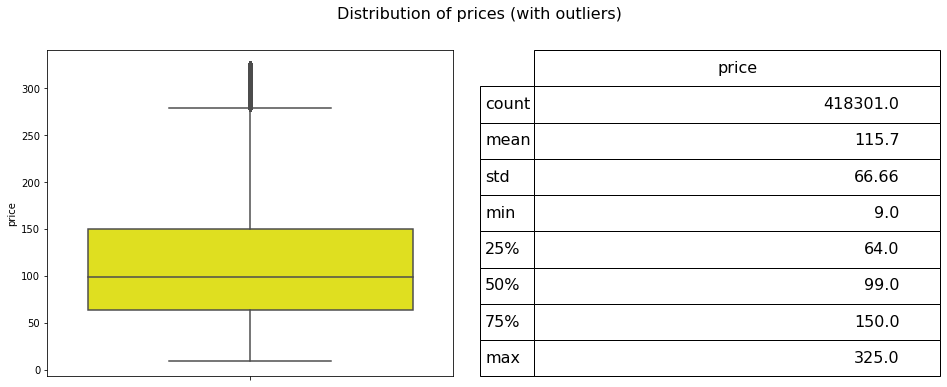

In [80]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

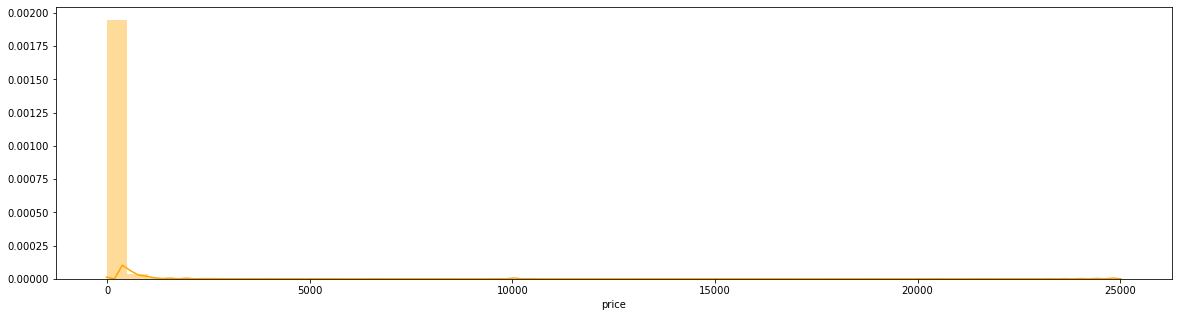

In [81]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

In [82]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

skewed_features = []
for column in dists:
    skew = abs(data_new[column].skew())
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(skew),'Min value: {}'.format(data_new[column].min()))

price           Skewness: 00.98 Min value: 9
minimum_nights  Skewness: 14.94 Min value: 1
calculated_host_listings_count Skewness: 06.70 Min value: 1
number_of_reviews Skewness: 03.41 Min value: 0
reviews_per_month Skewness: 03.98 Min value: 0.0
availability_365 Skewness: 00.51 Min value: 0


In [83]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer

In [84]:

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

In [85]:
data_new['price'],price_lambda = boxcox(data_new['price'])
print('"price lambda": {}'.format(price_lambda))

"price lambda": 0.08544778389437244


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
data_new['minimum_nights'],lam = boxcox(data_new['minimum_nights'])
print('"minimum_nights lambda": {}'.format(lam))

"minimum_nights lambda": -0.3757790878021529


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
data_new['calculated_host_listings_count'],lam = boxcox(data_new['calculated_host_listings_count'])
print('calculated_host_listings_count: {}'.format(lam))

calculated_host_listings_count: -0.9952732587556157


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
values = data_new['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)

[-0.05825883]


In [89]:
data_new['number_of_reviews']= boxcox1p(data_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

"number_of_reviews lambda: [-0.05825883]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
values = data_new['reviews_per_month'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)

[-0.97882506]


In [91]:
data_new['reviews_per_month']= boxcox1p(data_new['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

"reviews_per_month lambda: [-0.97882506]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
values = data_new['availability_365'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)

[0.21229907]


In [93]:
data_new['availability_365']= boxcox1p(data_new['availability_365'],pt.lambdas_)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))

"availability_365 lambda: [0.21229907]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
data_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,6.492356,0.900074,3.482156,0.265525,0.500726,11.781787
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,5.240736,0.000000,4.973062,0.839424,0.000000,1.237299
2,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,4.901923,1.910330,3.514008,0.265525,0.000000,1.237299
3,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,6.492356,1.380291,0.679338,0.009902,0.000000,11.724015
4,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,5.182527,0.610228,5.176675,0.782044,0.000000,11.635918


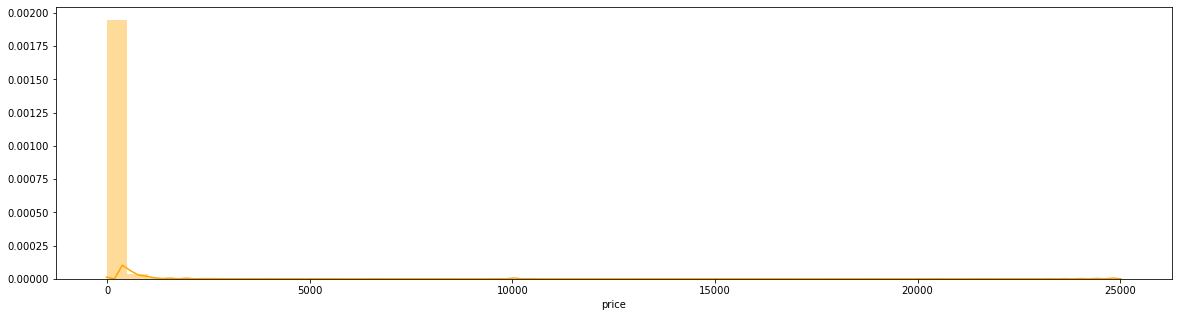

In [95]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

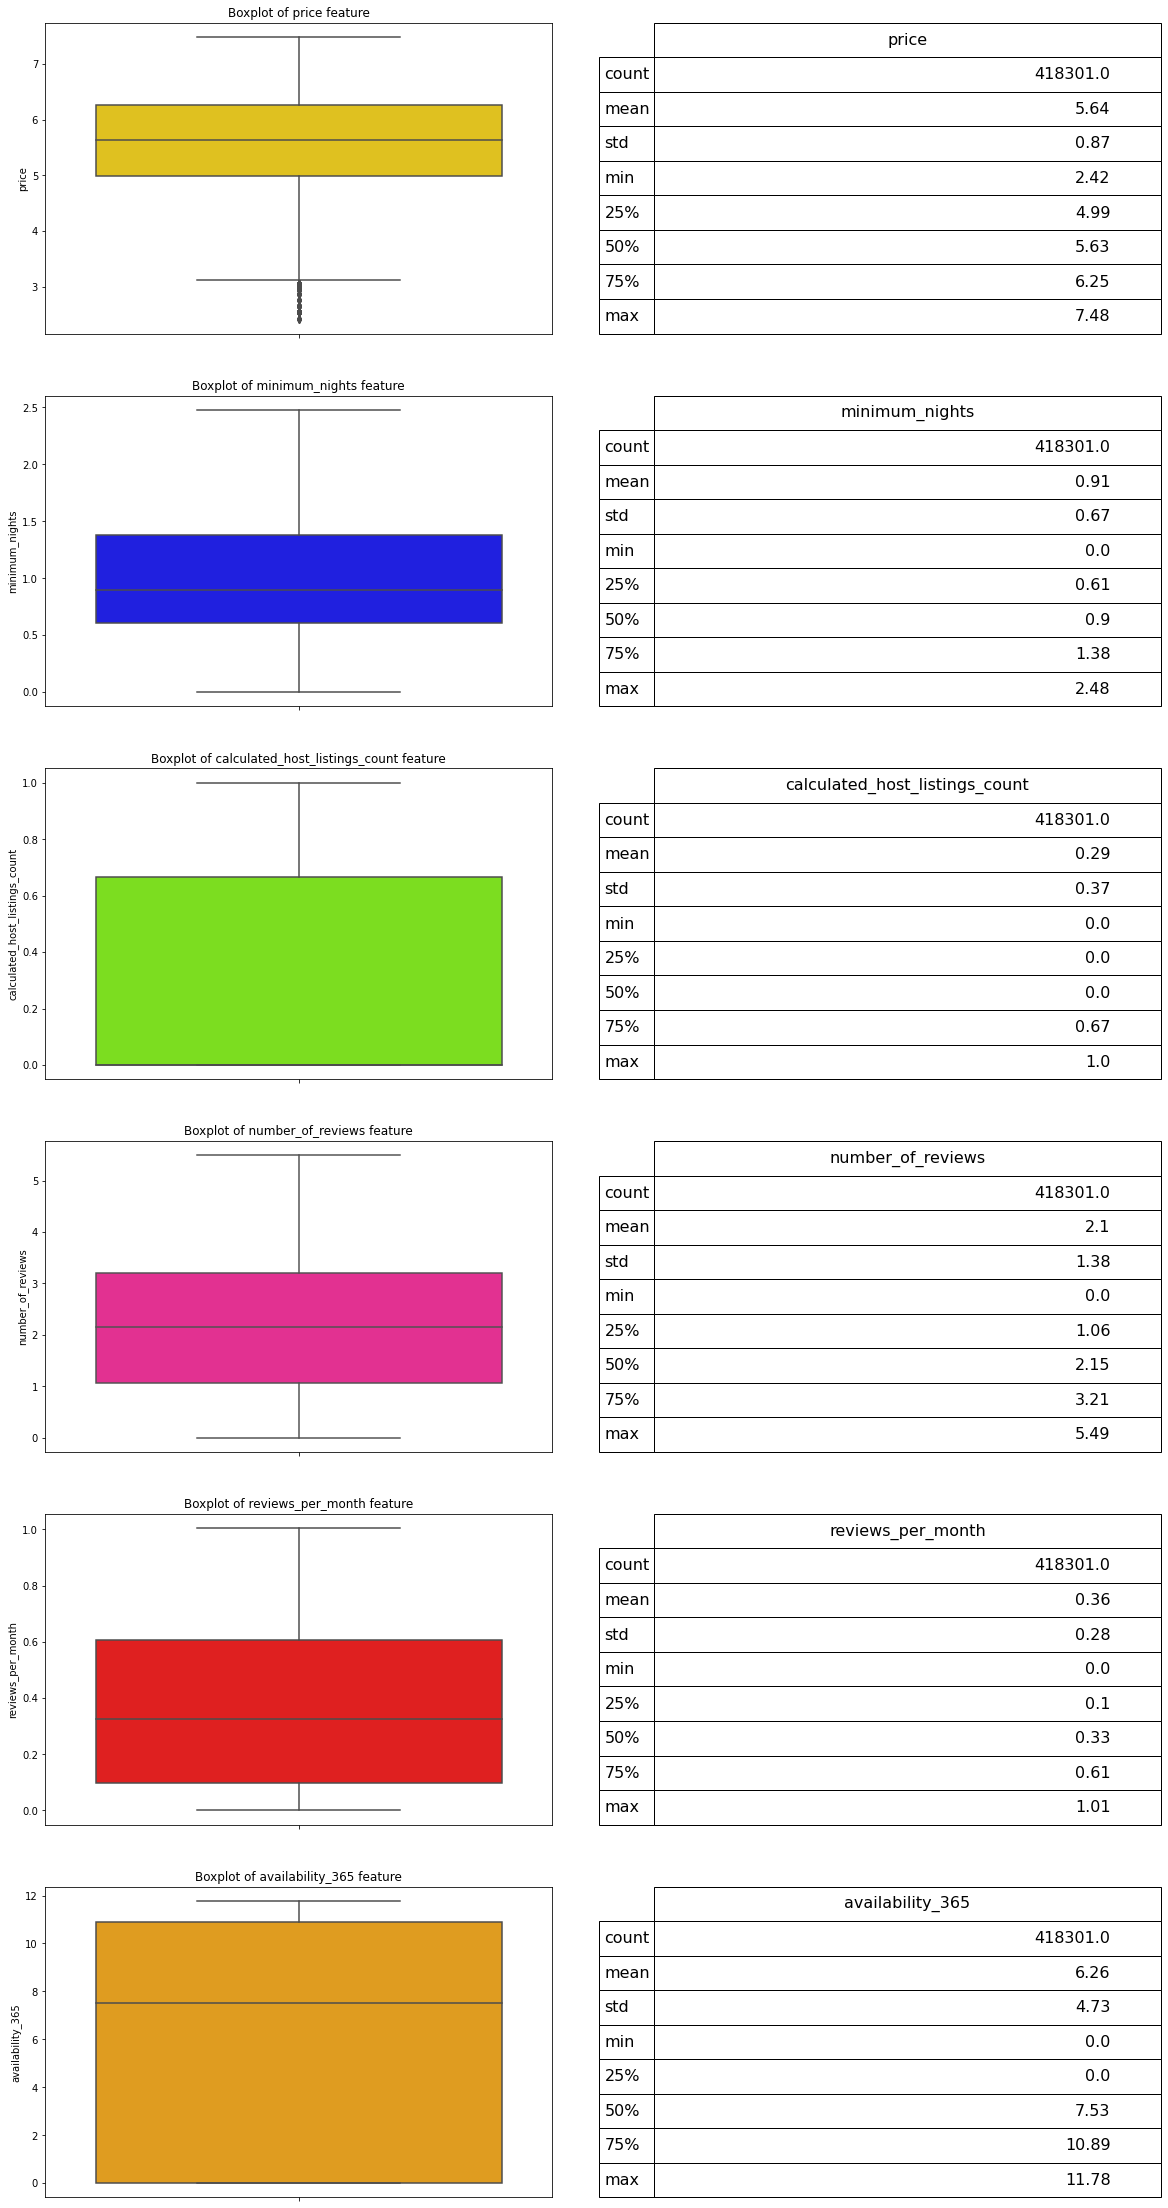

In [96]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

In [97]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [98]:
#transforming the categorical data
labelencoder = LabelEncoder()
data_new['neighbourhood'] = labelencoder.fit_transform(data_new['neighbourhood'])
data_new['neighbourhood_group'] = labelencoder.fit_transform(data_new['neighbourhood_group'])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [99]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,129,40.75362,-73.98377,Entire home/apt,6.492356,0.900074,3.482156,0.265525,0.500726,11.781787
1,1,41,40.68514,-73.95976,Entire home/apt,5.240736,0.000000,4.973062,0.839424,0.000000,1.237299
2,1,13,40.68688,-73.95596,Private room,4.901923,1.910330,3.514008,0.265525,0.000000,1.237299


In [100]:
data_new = pd.get_dummies(data_new)


In [102]:
data_new.head()


,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,129,40.75362,-73.98377,6.492356,0.900074,3.482156,0.265525,0.500726,11.781787,1,0,0,0
1,1,41,40.68514,-73.95976,5.240736,0.000000,4.973062,0.839424,0.000000,1.237299,1,0,0,0
2,1,13,40.68688,-73.95596,4.901923,1.910330,3.514008,0.265525,0.000000,1.237299,0,0,1,0
3,1,193,40.66120,-73.99423,6.492356,1.380291,0.679338,0.009902,0.000000,11.724015,1,0,0,0
4,2,97,40.76489,-73.98493,5.182527,0.610228,5.176675,0.782044,0.000000,11.635918,0,0,1,0


In [103]:
target = data_new['price']


In [104]:
data_new.drop('price', axis=1, inplace=True)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=42)

In [106]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
159260,2,181,40.71972,-73.99986,0.610228,4.277674,0.680855,0.500726,9.441539,0,0,1,0
79798,1,52,40.67892,-73.96334,1.919834,3.256397,0.291780,0.000000,11.714312,1,0,0,0
211302,1,61,40.66097,-73.93190,1.080524,3.085421,0.594947,0.500726,7.263174,1,0,0,0
202414,1,217,40.72022,-73.95727,1.540957,1.701413,0.107269,0.000000,7.941353,1,0,0,0
113044,2,96,40.82065,-73.95390,1.380291,2.828705,0.206835,0.000000,11.781787,0,0,1,0


In [107]:
y_train

159260    6.093319
79798     6.343892
211302    5.202169
202414    7.237969
113044    5.403549
            ...   
259178    4.498719
365838    5.642763
131932    4.700120
146867    3.537693
121958    5.470899
Name: price, Length: 334640, dtype: float64

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [110]:
X_train

array([[ 0.39345663,  1.0642371 , -0.15722468, ..., -0.08910479,
         1.07384051, -0.15368995],
       [-0.89278696, -0.78932093, -0.88150934, ..., -0.08910479,
        -0.93123698, -0.15368995],
       [-0.89278696, -0.66000293, -1.20015908, ..., -0.08910479,
        -0.93123698, -0.15368995],
       ...,
       [-0.89278696, -1.13416893, -0.44321061, ..., -0.08910479,
         1.07384051, -0.15368995],
       [-0.89278696, -0.78932093, -0.99654279, ..., -0.08910479,
         1.07384051, -0.15368995],
       [-0.89278696, -1.20601227, -2.65689435, ..., -0.08910479,
        -0.93123698, -0.15368995]])

In [116]:
# Add a 1 column to the start to allow vectorized gradient descent
X_train = np.c_[np.ones(X_train.shape[0]), X_train] 

In [118]:
X_train

array([[ 1.        ,  0.39345663,  1.0642371 , ..., -0.08910479,
         1.07384051, -0.15368995],
       [ 1.        , -0.89278696, -0.78932093, ..., -0.08910479,
        -0.93123698, -0.15368995],
       [ 1.        , -0.89278696, -0.66000293, ..., -0.08910479,
        -0.93123698, -0.15368995],
       ...,
       [ 1.        , -0.89278696, -1.13416893, ..., -0.08910479,
         1.07384051, -0.15368995],
       [ 1.        , -0.89278696, -0.78932093, ..., -0.08910479,
         1.07384051, -0.15368995],
       [ 1.        , -0.89278696, -1.20601227, ..., -0.08910479,
        -0.93123698, -0.15368995]])

In [120]:
# Set hyperparameters
alpha = 0.01
iterations = 1000

In [122]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [123]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

In [124]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [126]:
 # Initialize Theta Values to 0
theta = np.zeros(X_train.shape[1])
initial_cost, _ = cost_function(X_train, y_train, theta)

In [127]:
print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))


With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], cost error is 16.25832157208216


In [128]:
theta, cost_num = gradient_descent(X_train, y_train, theta, alpha, iterations)


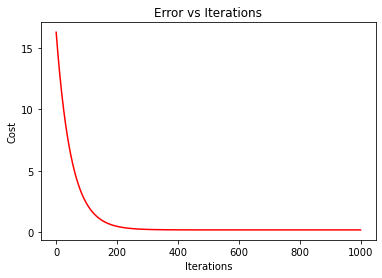

In [129]:
plotChart(iterations, cost_num)

In [130]:
final_cost, _ = cost_function(X_train, y_train, theta)


In [131]:
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

With final theta values of [ 5.63594509  0.03001383  0.03870463  0.05791201 -0.1838401  -0.09394513
  0.00967508 -0.04557404 -0.03906145  0.07625817  0.28620996  0.0392841
 -0.24695458 -0.15589837], cost error is 0.1892037240847851


# Gradient Boosting

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=100)

In [133]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
278363,2,209,40.84695,-73.93593,0.000000,3.396090,0.643433,0.000000,0.000000,0,0,1,0
349084,1,13,40.68402,-73.94240,0.000000,0.679338,0.056638,0.500726,9.424622,0,0,1,0
371674,1,217,40.71759,-73.96641,1.080524,2.313414,0.231383,0.000000,0.000000,1,0,0,0
293349,2,96,40.81732,-73.95328,0.000000,1.536288,0.470898,0.000000,7.386332,0,0,1,0
372527,1,61,40.63682,-73.94947,0.000000,2.789799,0.575240,0.000000,0.000000,1,0,0,0


In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [136]:
model = GradientBoostingRegressor()

In [137]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


In [138]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [139]:
n_scores

array([-0.43183119, -0.43071417, -0.42891404, -0.42835709, -0.4298303 ,
       -0.43301233, -0.43255539, -0.42838436, -0.4254162 , -0.42836757,
       -0.42877492, -0.43112593, -0.4272471 , -0.4265812 , -0.43026676,
       -0.42893717, -0.42836967, -0.43180646, -0.43256671, -0.43056164,
       -0.4322029 , -0.42833677, -0.43043107, -0.42652516, -0.42986819,
       -0.42992371, -0.42853001, -0.43228318, -0.43002562, -0.42969848])

In [140]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.430 (0.002)


In [144]:
row = [ 0.39105204,  1.4673069 ,  2.10045507,  0.23300918, -1.35014252,
        0.94079499,  1.02778112, -0.7818079 , -1.32591596, -1.00866773,
       -0.08893427,  1.07400179, -0.15503939]

In [156]:
row_2 = [-0.89469112,  1.58226505, -0.19585709, -0.37207847,  0.25490224,
        0.15710692, -0.4607506 , -0.7818079 , -1.32591596,  0.99140675,
       -0.08893427, -0.93109715, -0.15503939]

In [146]:
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [157]:
yhat = model.predict([row_2])


In [158]:
yhat

array([6.44783089])

In [154]:
X_train[2]

array([-0.89469112,  1.58226505, -0.19585709, -0.37207847,  0.25490224,
        0.15710692, -0.4607506 , -0.7818079 , -1.32591596,  0.99140675,
       -0.08893427, -0.93109715, -0.15503939])

In [155]:
y_train[2]

4.901923405711247

In [160]:
y_pred=model.predict(X_test)


In [161]:
y_pred

array([6.16637241, 6.20439986, 6.20439986, ..., 6.20439986, 5.96032448,
       6.16784302])

In [162]:
y_test

76808     4.617042
78317     6.254260
79555     4.336478
305058    6.701153
388501    5.101415
            ...   
133574    5.566905
200547    6.353562
104547    5.642763
103760    4.778924
163327    6.536207
Name: price, Length: 83661, dtype: float64

In [163]:
print (model.feature_importances_)

[0.         0.0043671  0.07585343 0.1309803  0.02494838 0.00105016
 0.00378302 0.02300165 0.01658703 0.69300805 0.01162501 0.00129733
 0.01349854]


In [165]:
#Let's go instantiate, fit and predict. 
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test) 

In [166]:
print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train) )
print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test) )

R-squared for Train: 0.59
R-squared for Test: -1.02
